![MLU Logo](../../data/MLU_Logo.png)

In this exercise, we will investigate the effect of adding more trees in a Bagging model considering two different sampling sizes: 100% and 1% of the original dataset size.

In [1]:
! pip install -q -r ../../requirements.txt

__Dataset:__

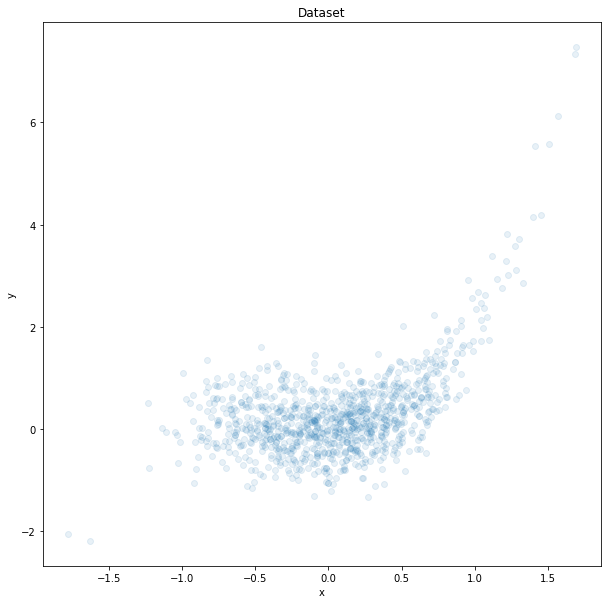

In [2]:
# Build and plot a test dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(1701)

x = np.random.randn(1000)/2
y = x**2+x**3 + 0.5*np.random.randn(1000)

plt.figure(figsize=(10,10))
plt.title("Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x,y,alpha=0.1)
plt.show()

__Bagging with full sampling size:__

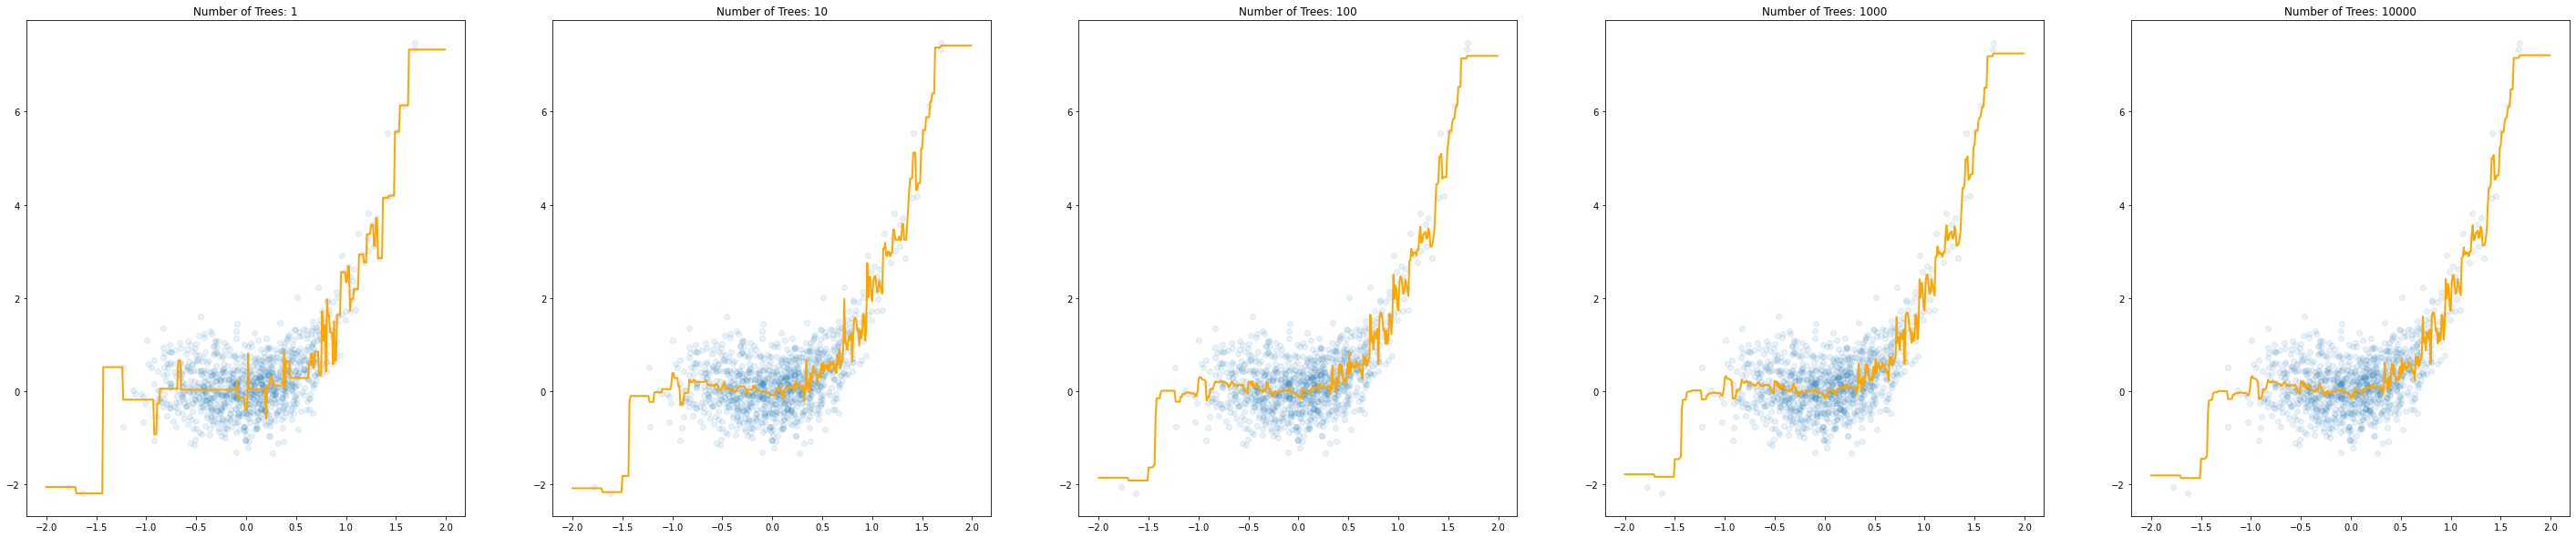

In [3]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor

xp = np.arange(-2.0, 2.0, 0.01)
model = DecisionTreeRegressor(max_depth = 8)

def plot_bagged(k = 1, n_prime = 1000):
    yp_bagged = np.zeros(len(xp))
    for i in range(k) :
        xr, yr = resample(x,y, n_samples = n_prime)
        model = DecisionTreeRegressor(max_depth = 8)
        model.fit(np.array(xr).reshape(-1,1),yr)
        
        yp_bagged += model.predict(np.array(xp).reshape(-1,1))/float(k)
    # Plot the results
    plt.scatter(x,y,alpha=0.1)
    plt.plot(xp,yp_bagged,linewidth=2,color='orange')
    
plt.figure(figsize = (50,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plot_bagged(10**i)
    plt.title("Number of Trees: {}".format(10**i))
plt.show()

__Bagging with 1% sampling size:__

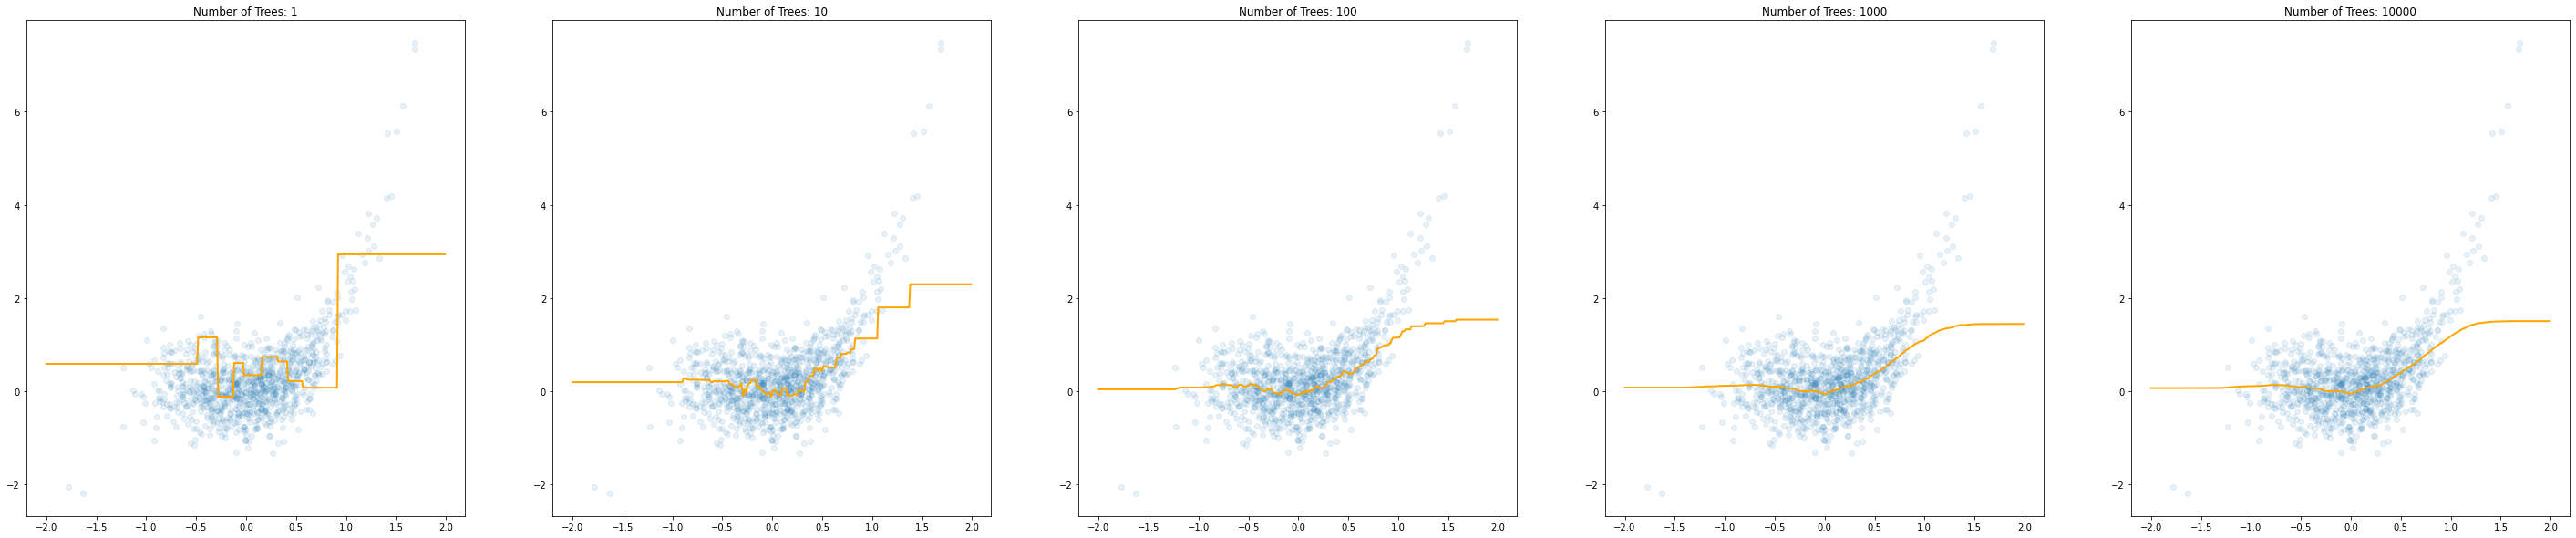

In [4]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor

xp = np.arange(-2.0, 2.0, 0.01)
model = DecisionTreeRegressor(max_depth = 8)

def plot_bagged(k = 1, n_prime = 1000):
    yp_bagged = np.zeros(len(xp))
    for i in range(k) :
        xr, yr = resample(x,y, n_samples = n_prime)
        model = DecisionTreeRegressor(max_depth = 8)
        model.fit(np.array(xr).reshape(-1,1),yr)
        
        yp_bagged += model.predict(np.array(xp).reshape(-1,1))/float(k)
    # Plot the results
    plt.scatter(x,y,alpha=0.1)
    plt.plot(xp,yp_bagged,linewidth=2,color='orange')
    
plt.figure(figsize = (50,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plot_bagged(10**i, 10)
    plt.title("Number of Trees: {}".format(10**i))
plt.show()